In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from pmdarima import auto_arima
import warnings

In [164]:
warnings.filterwarnings('ignore')

In [165]:
file_path = '../../../volza/magnesium/magnesium.csv'
data = pd.read_csv(file_path)

# Only keep YY-MM-DD
data['Date'] = pd.to_datetime(data['Date'].str.split(' ').str[0])
data.sort_values('Date', inplace=True)

# Set 'Date' as the index
data.set_index('Date', inplace=True)

In [166]:
# Convert columns to numeric, coercing errors (turning non-numeric to NaN)
numeric_columns = ['Value', 'Unit Rate $', 'Quantity']
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Replace zeros with NaN and interpolate
for col in numeric_columns:
    data[col].replace(0, pd.NA, inplace=True)
    data[col].interpolate(method='linear', inplace=True)

In [167]:
# Filter for specific countries
# countries_export = ['China', 'Netherlands', 'Germany','Israel', 'Turkey']
countries_export = ['China']
# countries_import = ['Netherlands']

filtered_data = data[(data['Country of Origin'].isin(countries_export))]


# filtered_data = data[(data['Country of Origin'].isin(countries_export)) & 
#                      (data['Country of Destination'].isin(countries_import))]

filtered_data[['Country of Origin', 'Country of Destination', 'Value', 'Unit Rate $', 'Quantity', 'Unit']].head(10)

,Country of Origin,Country of Destination,Value,Unit Rate $,Quantity,Unit
Date,,,,,,
2020-01-01,China,Netherlands,10015044.94,NaN,<NA>,UNT
2020-01-01,China,Vietnam,<NA>,2.47,5000.0,KGS
2020-01-01,China,Hungary,215385.39,NaN,<NA>,UNT
2020-01-01,China,Vietnam,<NA>,2.095,20000.0,KGS
2020-01-01,China,Slovenia,2443624.72,NaN,<NA>,UNT
2020-01-01,China,Italy,573502.25,NaN,<NA>,UNT
2020-01-01,China,Vietnam,<NA>,2275.0,24.0,TNE
2020-01-01,China,Vietnam,<NA>,2275.0,24.0,TNE
2020-01-01,China,Vietnam,<NA>,2.123,21000.0,KGS


In [168]:
grouped_data = filtered_data.groupby('Country of Origin')

In [169]:
# Initialize a dictionary to store the autoregression models and predictions for each country
ar_models = {}
predictions = {}

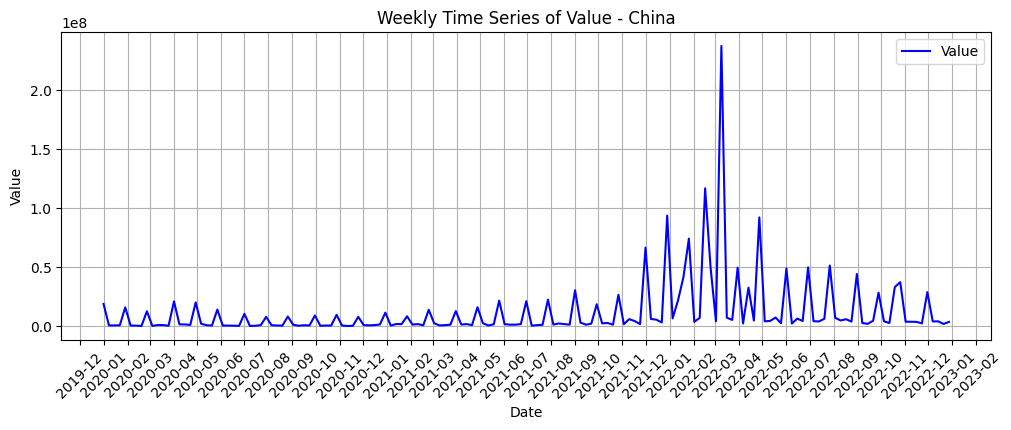

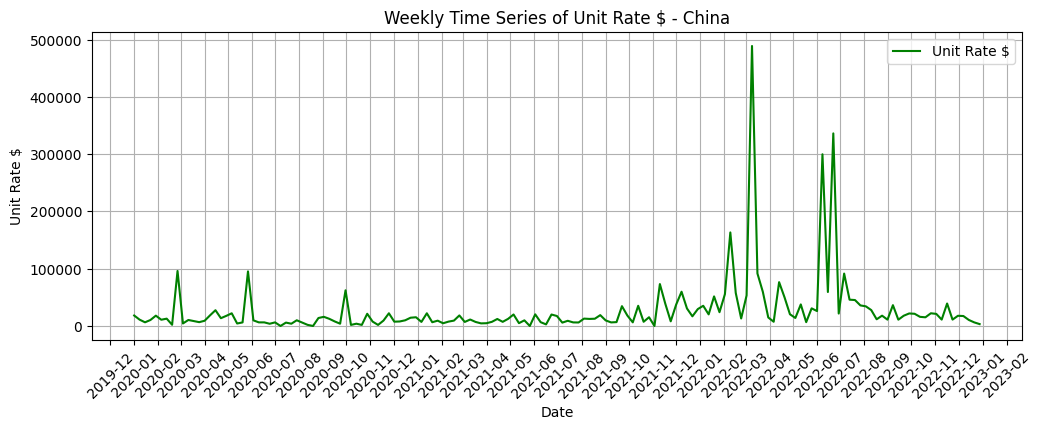

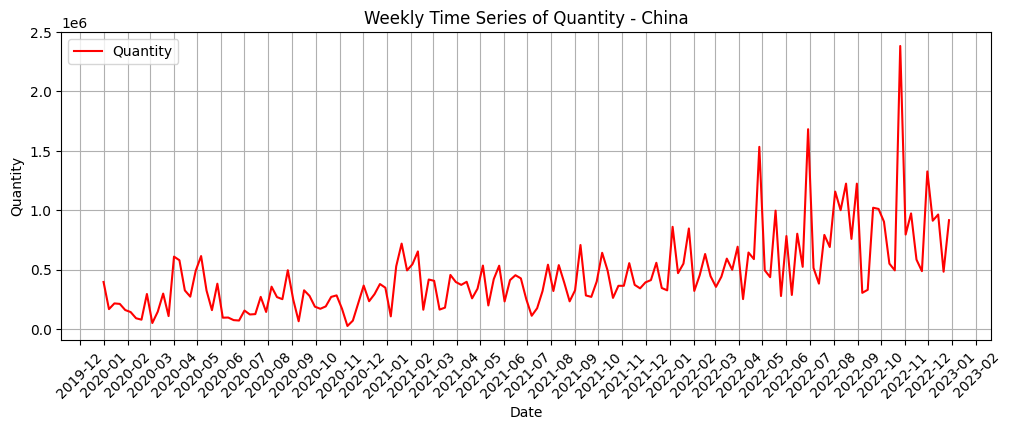

In [170]:
# Plotting time series for each metric and country
for country, group in grouped_data:
    # Resample data weekly and sum 'Value', 'Unit Rate $', and 'Quantity'
    weekly_data = group[['Value', 'Unit Rate $', 'Quantity']].resample('7D').sum()

    # Plot for 'Value'
    plt.figure(figsize=(12, 4))
    plt.plot(weekly_data.index, weekly_data['Value'], label='Value', color='blue')
    plt.title(f'Weekly Time Series of Value - {country}')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.show()

    # Plot for 'Unit Rate $'
    plt.figure(figsize=(12, 4))
    plt.plot(weekly_data.index, weekly_data['Unit Rate $'], label='Unit Rate $', color='green')
    plt.title(f'Weekly Time Series of Unit Rate $ - {country}')
    plt.xlabel('Date')
    plt.ylabel('Unit Rate $')
    plt.xticks(rotation=45)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.grid(True)
    plt.show()

    # Plot for 'Quantity'
    plt.figure(figsize=(12, 4))
    plt.plot(weekly_data.index, weekly_data['Quantity'], label='Quantity', color='red')
    plt.title(f'Weekly Time Series of Quantity - {country}')
    plt.xlabel('Date')
    plt.ylabel('Quantity')
    plt.xticks(rotation=45)
    plt.legend()
    plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.grid(True)
    plt.show()